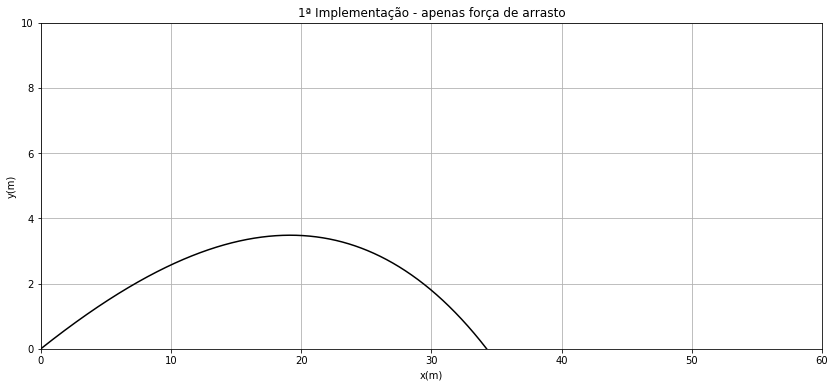

In [16]:
#primeira implementaco: força de arrasto

import math
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

X_lista = [0]
Y_lista = [0]
VX_lista = [0]
VY_lista = [0]
ax_lista = [0]
ay_lista = [0]
def EqDif(lista_sol,t):
    X=lista_sol[0]
    Y=lista_sol[1]
    Vx=lista_sol[2]
    Vy=lista_sol[3]
    
    X_lista.append(X)
    Y_lista.append(Y)
    VX_lista.append(Vx)
    VY_lista.append(Vy)
    
    dXdt=Vx
    dYdt=Vy
    dVxdt=-((Cd*A*pho*(Vx**2+Vy**2)*Vx/((Vx**2+Vy**2)**(1/2)))/(2*mBola))
    dVydt=-(((Cd*A*pho*(Vx**2+Vy**2)*Vy/((Vx**2+Vy**2)**(1/2)))/2*mBola)+g)
    
    ax_lista.append(dVxdt)
    ay_lista.append(dVydt)
    
    if Vy < 0 and Y <=0:
        dXdt=0
        dYdt=0
        dVxdt=0
        dVydt=0
    
   
    return [dXdt, dYdt, dVxdt, dVydt]

Cd=0.47 #Coeficiente de arrasto (adimensional)
pho=1.225 #kg/m3
g=10 #m/s^2
mBola=670*10**-3 #kg
r=0.11 #11cm
A=math.pi*r**2 #m2

tempo=np.arange(0,3.2,0.001) #lista tempo
Vo=29.1 #velocidade inicial em m/s (105km/h)
angulo=math.radians(17.6) #angulo inicial do chute - 17.6 graus

CI=[0, 0 ,Vo*math.cos(angulo), Vo*math.sin(angulo)] #condicoes iniciais

solucao=odeint(EqDif,CI,tempo)

plt.figure(figsize=(14,6))
plt.title('1ª Implementação - apenas força de arrasto')
plt.xlim((0,60))
plt.ylim((0,10))
plt.plot(solucao[:,0], solucao[:,1], 'k-')
plt.xlabel('x(m)')
plt.ylabel('y(m)')
plt.grid(True)
plt.show()


In [21]:
import pandas as pd
df = pd.DataFrame(ax_lista)
df
#df.to_excel("bibiVel.xlsx")
len(VY_lista)

194

In [11]:
#variação da quantidade de dipirona no sangue

import numpy as np
import matplotlib.pyplot as plt

#criar uma lista tempo

tempominimo=0
tempomaximo=3.2
deltat=0.001
Tempo=np.arange(tempominimo,tempomaximo,deltat)

#criar uma lista da quantidade de dipirona no corpo

dorflex=300 #quantidade de dipirona presente em uma dose de Dorflex
ke=2 #constante de eliminação do estômago
ks=0.225 #constante de eliminação do sangue
Vx=[0]
Vy=[0]
dVx=[0]
dVy=[0]
i=1
while i<len(Tempo):        
    dxdt=vx[i] #equação diferencial no estômago
    dydt=ke*E[i-1]-ks*S[i-1] #equação diferencial no sangue
    Vx.append(E[i-1]+de_dt*deltat) #equação a diferença no estômago
    Vyappend(S[i-1]+ds_dt*deltat) #equação a diferença no sangue
    i+=1
    
#criar um gráfico
    
plt.figure(figsize=(12,8)) 

plt.plot (Tempo, S, 'k-', color='purple') #linha continua azul


plt.title ('Variação da quantidade de dipirona no sangue')

plt.grid(True)
plt.xlabel('Tempo (h)')
plt.ylabel('Massa (mg)')
plt.show()

NameError: name 'vx' is not defined

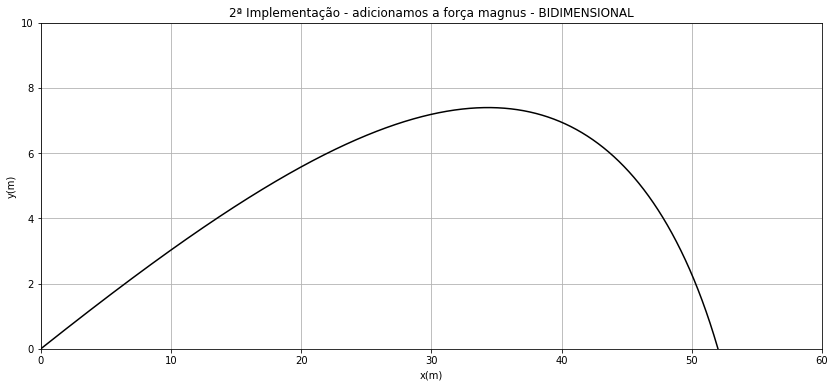

In [12]:
#segunda implementacao: forca de arrasto + forca magnus (back spin) -> efeito de sustentacao
import math
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def EqDif (lista_sol,t):
    X=lista_sol[0]
    Y=lista_sol[1]
    Vx=lista_sol[2]
    Vy=lista_sol[3]
    
    dXdt=Vx
    dYdt=Vy
    dVxdt=-(((Cd*A*pho*(Vx**2+Vy**2)*Vx/((Vx**2+Vy**2)**(1/2)))/(2*mBola))-(1/2*Cm*pho*A*(Vx**2+Vy**2)*Vy/((Vx**2+Vy**2)**(1/2))/mBola))
    dVydt=(1/2*Cm*pho*A*(Vx**2+Vy**2)*Vy/((Vx**2+Vy**2)**(1/2))/mBola)-(((Cd*A*pho*(Vx**2+Vy**2)*Vy/((Vx**2+Vy**2)**(1/2)))/2*mBola)+g)
    
    if Vy < 0 and Y <=0:           
        dXdt=0
        dYdt=0
        dVxdt=0
        dVydt=0
    
    return [dXdt, dYdt, dVxdt, dVydt]

Cd=0.47 #Coeficiente de arrasto (adimensional)
Cm=1 #Coeficiente magnus (adimensional)
pho=1.225 #kg/m3
g=10 #m/s^2
mBola=670*10**-3 #kg
r=0.11 #11cm
A=math.pi*r**2 #m2

tempo=np.arange(0,3.2,0.001) #lista tempo
Vo=29.1 #velocidade inicial em m/s (105km/h)
angulo=math.radians(17.6) #angulo inicial do chute - 17.6 graus

CI=[0, 0 ,Vo*math.cos(angulo), Vo*math.sin(angulo)] #condicoes iniciais

solucao=odeint(EqDif,CI,tempo)

plt.figure(figsize=(14,6))
plt.title('2ª Implementação - adicionamos a força magnus - BIDIMENSIONAL')
plt.ylim((0,10))
plt.xlim((0,60))
plt.plot(solucao[:,0], solucao[:,1], 'k-')
plt.xlabel('x(m)')
plt.ylabel('y(m)')
plt.grid(True)
plt.show()

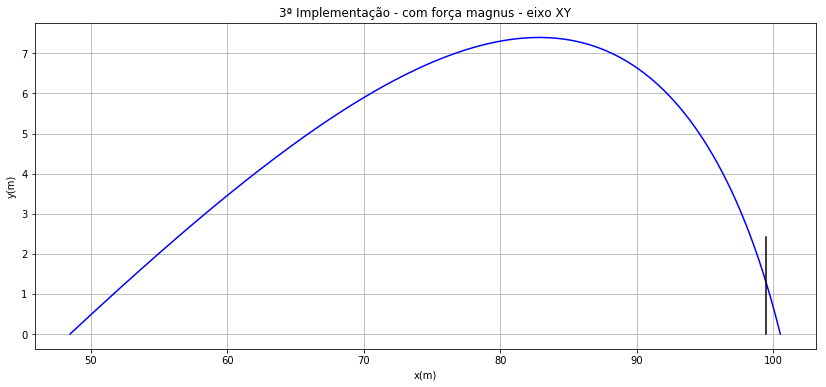

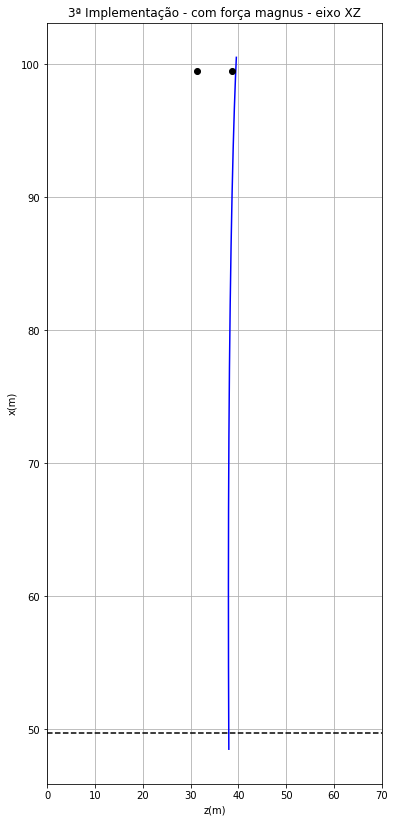

In [13]:
#terceira implementacao: forca de arrasto + forca magnus (backspin) + forca magnus (efeito lateral)
import math
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

def EqDif(lista_sol,t):
    X=lista_sol[0]
    Y=lista_sol[1]
    Z=lista_sol[2]
    Vx=lista_sol[3]
    Vy=lista_sol[4]
    Vz=lista_sol[5]
    
    dXdt=Vx
    dYdt=Vy
    dZdt=Vz
    dVzdt=(1/2*Cm*pho*A*((Vz**2+Vx**2)**(1/2)))/mBola
    dVxdt=-(((Cd*A*pho*(Vx**2+Vy**2)*Vx/((Vx**2+Vy**2)**(1/2)))/(2*mBola))-(1/2*Cm*pho*A*(Vx**2+Vy**2)*Vy/((Vx**2+Vy**2)**(1/2))/mBola))
    dVydt=(1/2*Cm*pho*A*(Vx**2+Vy**2)*Vy/((Vx**2+Vy**2)**(1/2))/mBola)-(((Cd*A*pho*(Vx**2+Vy**2)*Vy/((Vx**2+Vy**2)**(1/2)))/2*mBola)+g)
    
    if Vy < 0 and Y <=0:           
        dXdt=0
        dYdt=0
        dZdt=0
        dVxdt=0
        dVydt=0
        dVzdt=0
    
    return [dXdt, dYdt, dZdt, dVxdt, dVydt, dVzdt]

Cd=0.47 #Coeficiente de arrasto (adimensional)
Cm=1 #Coeficiente magnus (adimensional)
pho=1.225 #kg/m3
g=10 #m/s^2
mBola=670*10**-3 #kg
r=0.11 #11cm
A=math.pi*r**2 #m2

tempo=np.arange(0,3.2,0.001) #lista tempo
Vo=29.1 #velocidade inicial em m/s (105km/h)
angulo=math.radians(17.6) #angulo inicial do chute - 17.6 graus

CI=[48.5, 0, 38, Vo*math.cos(angulo), Vo*math.sin(angulo), -0.4] #condicoes iniciais

solucao=odeint(EqDif,CI,tempo)

#plotando o gol
x1=[]
for w in range (1, 245):
    x1.append(w*0+99.5) 
y1=np.arange(0, 2.44, 0.01)

lista1=[31.34, 38.66]
lista2=[99.5, 99.5]

lista_meio_z=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
lista_meio_x=[49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75]

plt.figure(figsize=(14,6))
plt.title('3ª Implementação - com força magnus - eixo XY')
plt.plot(solucao[:,0], solucao[:,1], 'b-')
plt.plot(x1, y1, 'k-')
plt.xlabel('x(m)')
plt.ylabel('y(m)')
plt.grid(True)
plt.show()

plt.figure(figsize=(6,14))
plt.title('3ª Implementação - com força magnus - eixo XZ')
plt.xlim((0, 70))
#plt.ylim((0, 105))
plt.plot(solucao[:,2], solucao[:,0], 'b-')
plt.plot(lista1, lista2, 'ko')
plt.plot(lista_meio_z, lista_meio_x, 'k--')
plt.xlabel('z(m)')
plt.ylabel('x(m)')
plt.grid(True)
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
ax.plot(solucao[:, 0], solucao[:, 2], solucao[:, 1])
ax.view_init(45,30)


    

In [ ]:
#chute se fosse canhoto - grafico conclusivo: "se fosse canhoto a bola entrava por conta do posicionamento inicial de pele e a força aplicada no sentido contrario à aplicada por um destro"
import math
import math
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

Cd=0.47
p=1.2
g=10
mBola=670*10**-3
b=11*10**-2
s=1
A=0.038
Cm = 1


def EqDif(lista_sol,t): #[X,Y,Vx,Vy]
    X=lista_sol[0]
    Y=lista_sol[1]
    Z=lista_sol[2]
    Vx=lista_sol[3]
    Vy=lista_sol[4]
    Vz=lista_sol[5]
    
    dXdt=Vx
    dYdt=Vy
    dZdt=Vz
    dVzdt=-(1/2*Cm*pho*A*((Vz**2+Vx**2)**(1/2)))/mBola
    dVxdt=-(((Cd*A*pho*(Vx**2+Vy**2)*Vx/((Vx**2+Vy**2)**(1/2)))/(2*mBola))-(1/2*Cm*pho*A*(Vx**2+Vy**2)*Vy/((Vx**2+Vy**2)**(1/2))/mBola))
    dVydt=(1/2*Cm*pho*A*(Vx**2+Vy**2)*Vy/((Vx**2+Vy**2)**(1/2))/mBola)-(((Cd*A*pho*(Vx**2+Vy**2)*Vy/((Vx**2+Vy**2)**(1/2)))/2*mBola)+g)
    
    if Vy < 0 and Y <=0:           
        dXdt=0
        dYdt=0
        dZdt=0
        dVxdt=0
        dVydt=0
        dVzdt=0
    
    return [dXdt, dYdt, dZdt, dVxdt, dVydt, dVzdt]

Cd=0.47 #Coeficiente de arrasto (adimensional)
Cm=1 #Coeficiente magnus (adimensional)
pho=1.225 #kg/m3
g=10 #m/s^2
mBola=670*10**-3 #kg
r=0.11 #11cm
A=math.pi*r**2 #m2

tempo=np.arange(0,3.2,0.001) #lista tempo
Vo=29.1 #velocidade inicial em m/s (105km/h)
angulo=math.radians(17.6) #angulo inicial do chute - 17.6 graus

CI=[48.5, 0, 38, Vo*math.cos(angulo), Vo*math.sin(angulo), -0.4] #condicoes iniciais

solucao=odeint(EqDif,CI,tempo)

#plotando o gol
x1=[]
for w in range (1, 245):
    x1.append(w*0+99.5) 
y1=np.arange(0, 2.44, 0.01)

lista1=[31.34, 38.66]
lista2=[99.5, 99.5]

lista_meio_z=[0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60, 65, 70]
lista_meio_x=[49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75, 49.75]


plt.figure(figsize=(14,6))
plt.title('segunda implementacao')
plt.plot(solucao[:,0], solucao[:,1], 'b-')
plt.plot(x1, y1, 'k-')
plt.xlabel('x(m)')
plt.ylabel('y(m)')
plt.grid(True)
plt.show()

plt.figure(figsize=(6,14))
plt.xlim((0, 70))
#plt.ylim((0, 105))
plt.plot(solucao[:,2], solucao[:,0], 'b-')
plt.plot(lista1, lista2, 'ko')
plt.plot(lista_meio_z, lista_meio_x, 'k--')
plt.xlabel('z(m)')
plt.ylabel('x(m)')
plt.grid(True)
plt.show()

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

ax.plot(solucao[:, 0], solucao[:, 2], solucao[:, 1])

for angle in range(0, 360):
    ax.view_init(45,30)
plt.draw()
plt.pause(.001)


In [ ]:
#chute se fosse canhoto - grafico conclusivo: "se fosse canhoto a bola entrava por conta do posicionamento inicial de pele e a força aplicada no sentido contrario à aplicada por um destro"
import math
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

Cd=0.47
p=1.2
g=10
mBola=670*10**-3
b=11*10**-2
s=1
A=0.038
Cm = 1


def EqDif(lista_sol,t): #[X,Y,Vx,Vy]
    X=lista_sol[0]
    Y=lista_sol[1]
    Z=lista_sol[2]
    Vx=lista_sol[3]
    Vy=lista_sol[4]
    Vz=lista_sol[5]
    
    dXdt=Vx
    dYdt=Vy
    dZdt=Vz
    dVzdt=(1/2*Cm*p*A*((Vz**2+Vx**2)**(1/2)))/mBola
    dVxdt=-(((Cd*A*p*(Vx**2+Vy**2)*Vx/((Vx**2+Vy**2)**(1/2)))/(2*mBola))-(1/2*Cm*p*A*(Vx**2+Vy**2)*Vy/((Vx**2+Vy**2)**(1/2))/mBola))
    dVydt=(1/2*Cm*p*A*(Vx**2+Vy**2)*Vy/((Vx**2+Vy**2)**(1/2))/mBola)-(((Cd*A*p*(Vx**2+Vy**2)*Vy/((Vx**2+Vy**2)**(1/2)))/2*mBola)+g)
    
    if Vy < 0 and Y <=0:           
        dXdt=0
        dYdt=0
        dZdt=0
        dVxdt=0
        dVydt=0
        dVzdt=0
    
    return [dXdt, dYdt, dZdt, dVxdt, dVydt, dVzdt]

angulo=math.radians(17)

tempo=np.arange(0,3.2,0.001)
Vo=29.1

CI=[48.5, 0, 32, 27.8, 8.8, -0.4]

solucao=odeint(EqDif,CI,tempo)

#plotar gol
x1=[]
for w in range (1, 245):
    x1.append(w*0+98.5)
y1=np.arange(0, 2.44, 0.01)

lista1=[31.34, 38.66]
lista2=[98.5, 98.5]

plt.figure(figsize=(14,6))
plt.title('segunda implementacao')
plt.plot(solucao[:,0], solucao[:,1], 'b-')
plt.plot(x1, y1, 'k-')
plt.xlabel('x(m)')
plt.ylabel('y(m)')
plt.grid(True)
plt.show()

plt.figure(figsize=(14,6))
plt.ylim((0, 70))
#plt.xlim((0, 105))
plt.plot(solucao[:,0], solucao[:,2], 'b-')
plt.plot(lista2, lista1, 'ko')
plt.xlabel('x(m)')
plt.ylabel('z(m)')
plt.grid(True)
plt.show()
